<a href="https://colab.research.google.com/github/HakureiPOI/Modeling_Allowance/blob/main/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class GeneticAlgorithm():
    def __init__(self, obj_function, dim, bounds, pop_size=100, max_iter=100, crossover_rate=0.8, mutation_rate=0.1, minimize=True):
        """
        初始化遗传算法（GA）

        参数：
        - obj_function: 目标函数，需要最小化
        - dim: 问题的维度
        - bounds: 每个维度的边界，格式为 [(lower_bound1, upper_bound1), ...]
        - pop_size: 种群大小
        - max_iter: 最大迭代次数
        - crossover_rate: 交叉概率
        - mutation_rate: 变异概率
        - minimize: 是否最小化目标函数（默认为True）
        """
        self.obj_function = obj_function
        self.dim = dim
        self.bounds = bounds
        self.pop_size = pop_size
        self.max_iter = max_iter
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.minimize = minimize

        # 初始化种群
        self.population = np.random.uniform(0, 1, (pop_size, dim))
        self.best_individual = None
        self.best_score = float('inf') if minimize else float('-inf')
        self.history = []

    def _evaluate_fitness(self, population):
        """评估种群中每个个体的适应度"""
        original_positions = population * (np.array([b[1] for b in self.bounds]) - np.array([b[0] for b in self.bounds])) + np.array([b[0] for b in self.bounds])
        fitness = np.array([self.obj_function(pos) for pos in original_positions])
        return fitness if self.minimize else -fitness

    def _select_parents(self, fitness):
        """基于轮盘赌选择父代"""
        probabilities = fitness / fitness.sum()
        indices = np.random.choice(np.arange(self.pop_size), size=self.pop_size, p=probabilities)
        return self.population[indices]

    def _crossover(self, parents):
        """执行交叉操作"""
        offspring = parents.copy()
        for i in range(0, self.pop_size, 2):
            if np.random.rand() < self.crossover_rate:
                crossover_point = np.random.randint(1, self.dim)
                offspring[i, crossover_point:], offspring[i + 1, crossover_point:] = offspring[i + 1, crossover_point:], offspring[i, crossover_point:]
        return offspring

    def _mutate(self, offspring):
        """执行变异操作"""
        for i in range(self.pop_size):
            for j in range(self.dim):
                if np.random.rand() < self.mutation_rate:
                    offspring[i, j] += np.random.uniform(-0.1, 0.1)
                    offspring[i, j] = np.clip(offspring[i, j], 0, 1)
        return offspring

    def optimize(self):
        """运行优化过程"""
        for iteration in range(self.max_iter):
            fitness = self._evaluate_fitness(self.population)
            best_idx = np.argmin(fitness) if self.minimize else np.argmax(fitness)
            if (self.minimize and fitness[best_idx] < self.best_score) or (not self.minimize and fitness[best_idx] > self.best_score):
                self.best_score = fitness[best_idx]
                self.best_individual = self.population[best_idx].copy()

            self.history.append(self.best_score)

            # 选择、交叉、变异
            parents = self._select_parents(1 / (1 + fitness))  # 最小化问题适配
            offspring = self._crossover(parents)
            self.population = self._mutate(offspring)

            print(f"第 {iteration + 1}/{self.max_iter} 代, 当前最优适应度: {self.best_score}")

        original_best = self.best_individual * (np.array([b[1] for b in self.bounds]) - np.array([b[0] for b in self.bounds])) + np.array([b[0] for b in self.bounds])
        return original_best, self.best_score

    def plot_optimization_history(self):
        sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))
        plt.plot(self.history, label="Best Fitness", color="b")
        plt.xlabel("Iteration")
        plt.ylabel("Best Fitness")
        plt.title("Optimization History")
        plt.legend()
        plt.show()

In [3]:
def complex_function(x):
    # x 是目标函数的变量列表
    return sum((1 - x[:-1])**2 + 100 * (x[1:] - x[:-1]**2)**2)

In [4]:
dim = 10
bounds = [(-5, 5)] * dim  # 每个维度不同的边界
ga = GeneticAlgorithm(obj_function=complex_function, dim=dim, bounds=bounds)

In [5]:
best_position, best_score = ga.optimize()

第 1/100 代, 当前最优适应度: 22959.07562115961
第 2/100 代, 当前最优适应度: 22959.07562115961
第 3/100 代, 当前最优适应度: 22959.07562115961
第 4/100 代, 当前最优适应度: 11085.062265540713
第 5/100 代, 当前最优适应度: 11085.062265540713
第 6/100 代, 当前最优适应度: 6633.889303073807
第 7/100 代, 当前最优适应度: 5971.069976192698
第 8/100 代, 当前最优适应度: 5971.069976192698
第 9/100 代, 当前最优适应度: 4845.532991899272
第 10/100 代, 当前最优适应度: 3643.7314732419127
第 11/100 代, 当前最优适应度: 3482.756901665716
第 12/100 代, 当前最优适应度: 2767.719146943285
第 13/100 代, 当前最优适应度: 1265.9888517091326
第 14/100 代, 当前最优适应度: 1265.9888517091326
第 15/100 代, 当前最优适应度: 693.5586783980585
第 16/100 代, 当前最优适应度: 693.5586783980585
第 17/100 代, 当前最优适应度: 680.320490780843
第 18/100 代, 当前最优适应度: 511.4038095345998
第 19/100 代, 当前最优适应度: 400.9759325245071
第 20/100 代, 当前最优适应度: 400.9759325245071
第 21/100 代, 当前最优适应度: 400.9759325245071
第 22/100 代, 当前最优适应度: 55.199448892904734
第 23/100 代, 当前最优适应度: 55.199448892904734
第 24/100 代, 当前最优适应度: 55.199448892904734
第 25/100 代, 当前最优适应度: 55.199448892904734
第 26/100 代, 当前最优适应度: 45.09

In [6]:
print(f"最优位置: {best_position}")
print(f"最优适应度: {best_score}")

最优位置: [0.93315553 0.95847505 0.90185419 0.85934239 0.77520943 0.79797658
 0.66666316 0.41370408 0.28758554 0.12027176]
最优适应度: 7.795919422504224


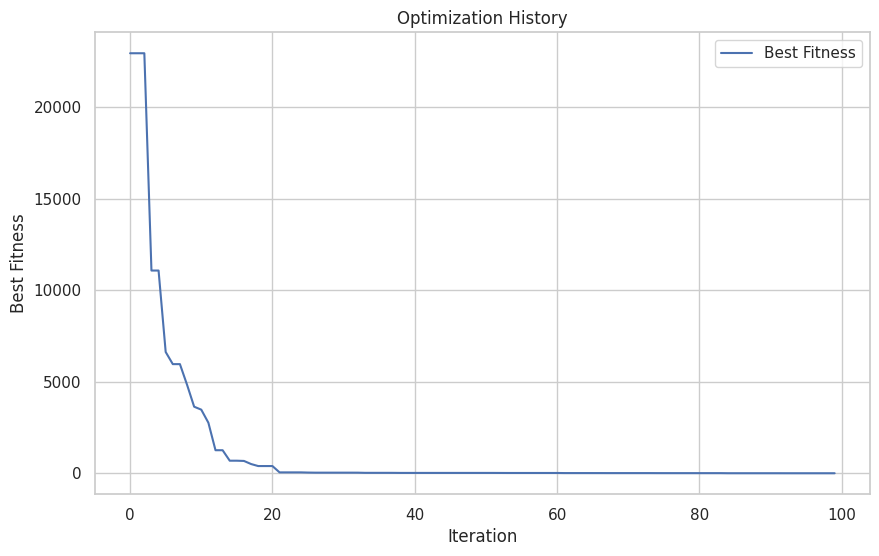

In [7]:
ga.plot_optimization_history()